###### À quoi ressemblerait Jupiter si on la regardait depuis un de ses points de Lagrange?

In [1]:
import math
import matplotlib.pyplot as plt

### Données

Depuis wikipédia, on obtient les valeurs numériques suivantes. Les distances sont en mètres et le masses en kilogrames. 

In [2]:
mj = 1.9e27 # Masse de Jupiter
ms = 1.99e30 # Masse du Soleil
djs = 7.79e11 # Distance Soleil-Jupiter
rj = 7.0e7 # Rayon de Jupiter
rs = 6.96e8 # Rayon du Soleil

### Diamètre apparent


Depuis une distance $d$, l'angle sous lequel est vue Jupiter (i.e son diamètre apparent) est donné par 

$
\theta = 2 \arctan \frac{R_J}{d}
$

$\theta$ est alors exprimé en radians, et il faut le convertir en degrés.

In [3]:
def diametre_apparent(distance, rayon=rj):
    theta = 2*math.atan2(rayon,distance)
    res = theta/math.pi*180
    return res

Notons que le diamètre apparent de la Lune vue depuis la Terre est de $0.5^\circ$.

# Jupiter vue de ses points de Lagrange

On cherche le diamètre apparent de Jupiter depuis ses points de Lagrange. Notons $M_S$ et $M_J$ la masse du Soleil et de Jupiter, respectivement, $R$ la distance Soleil-Jupiter et $R_J$ le diamètre de Jupiter.

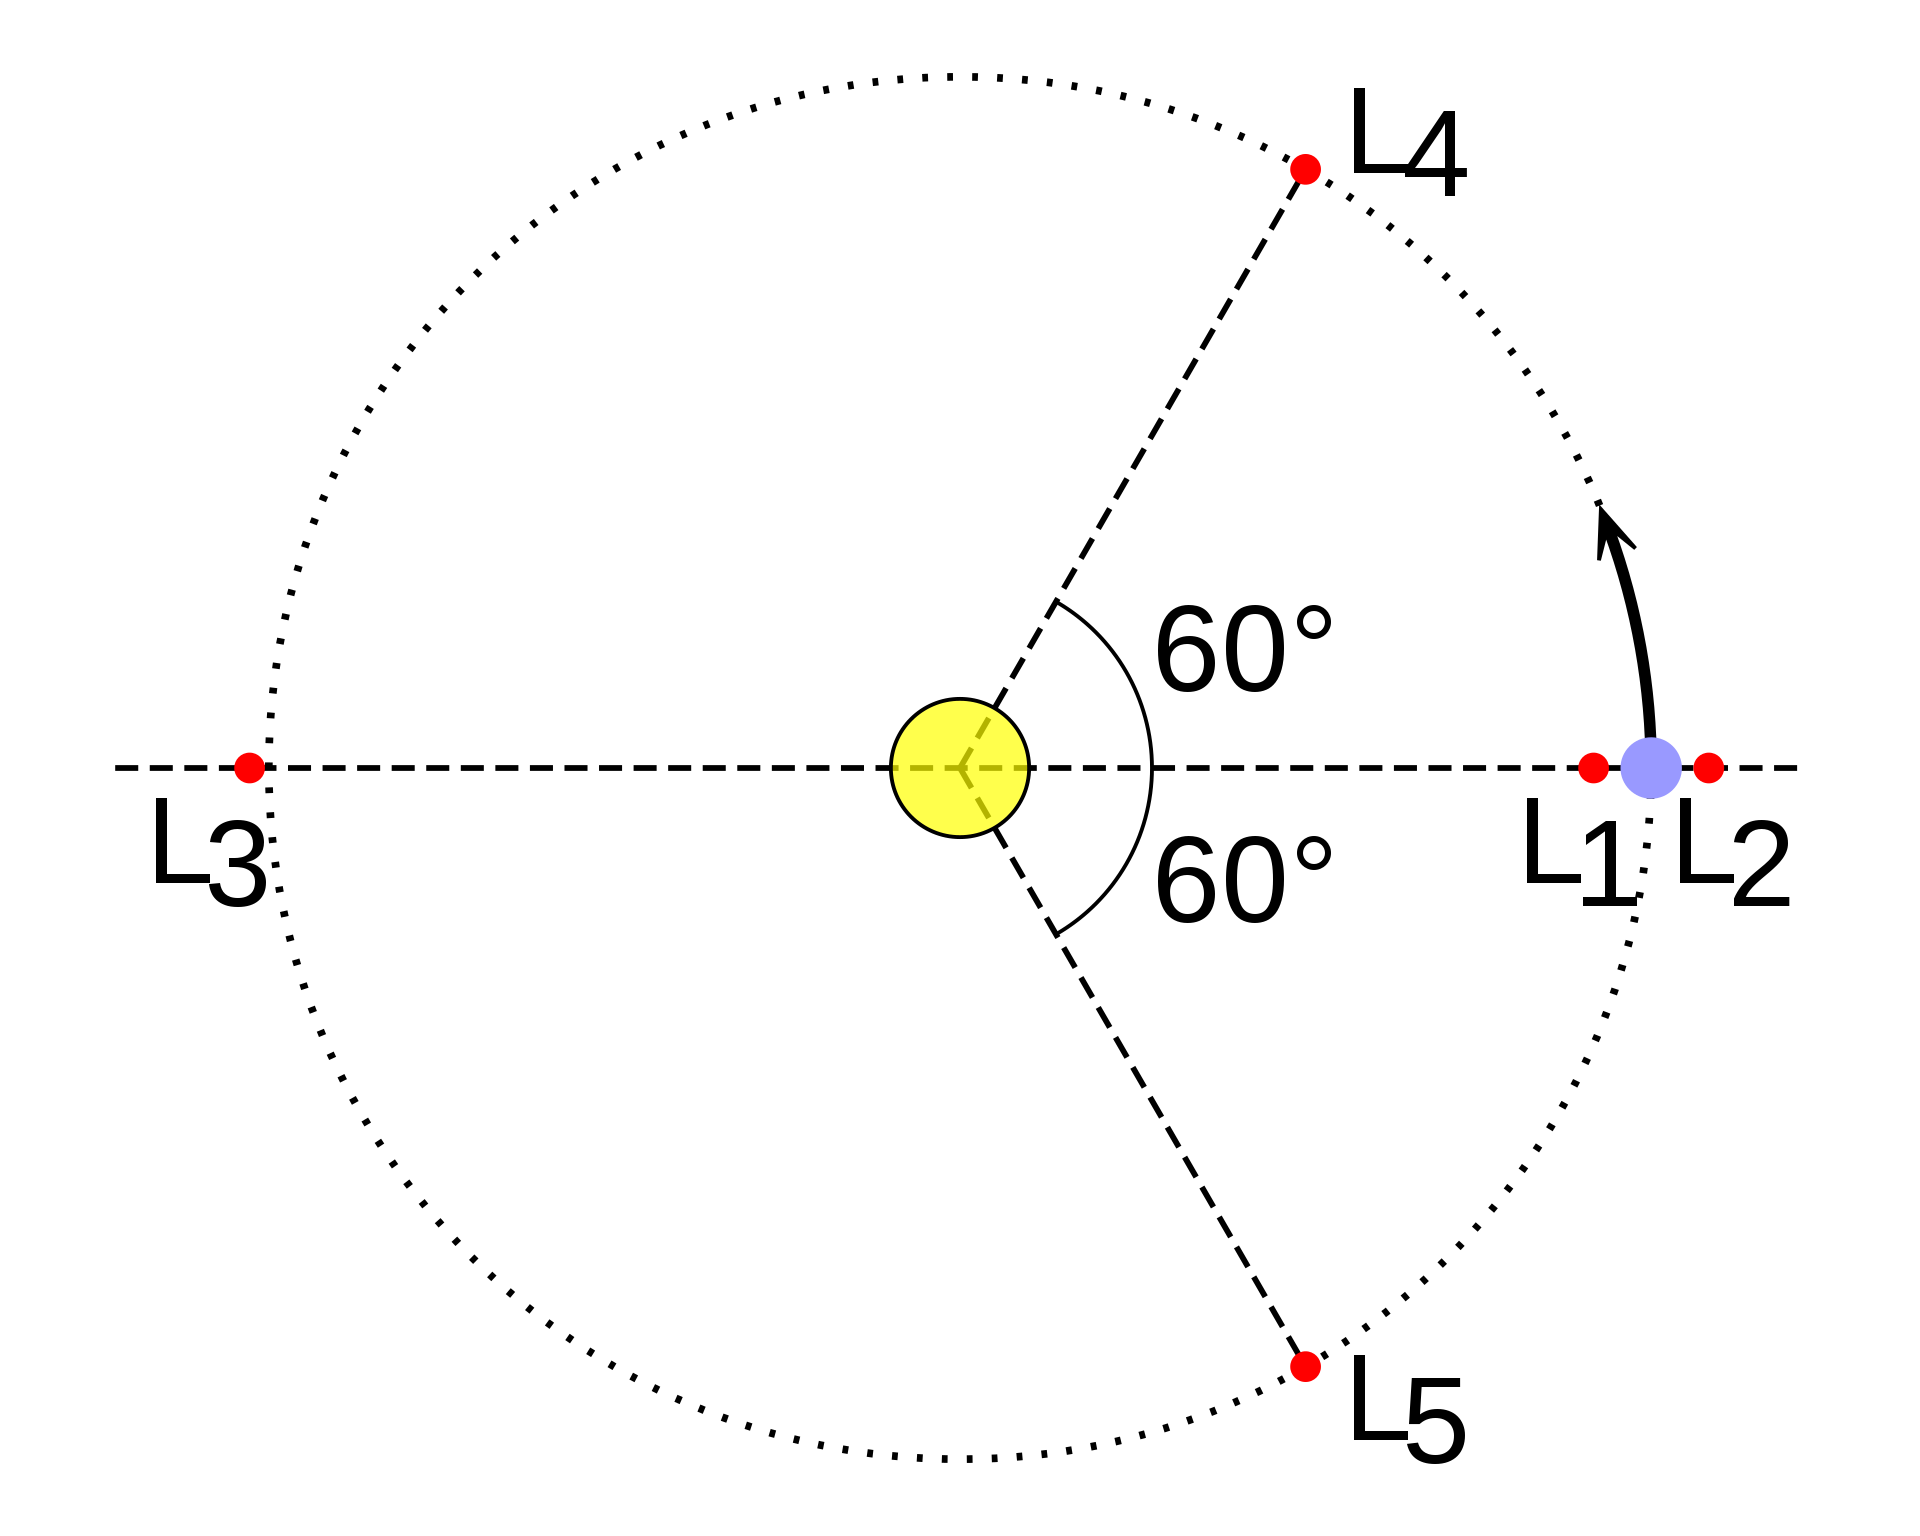

## L1 et L2, Jupiter pas si immense

La distance de Jupiter au point L1 ou L2 est 

$
d_1 = R \sqrt[3]{\frac{M_J}{3M_S}}
$

In [4]:
dj1 = dj2 = djs * (mj/3/ms)**(1/3.)
print("Distance Jupiter-L1 : {} millions de kms".format(dj1/1e9))

Distance Jupiter-L1 : 53.18598592230148 millions de kms


On a alors l'angle apparent

In [5]:
theta1 = diametre_apparent(dj1)
print("Jupiter ferait {:.2f} deg, soit {} fois la taille de la Lune vue depuis la Terre".format(theta1, theta1*2))

Jupiter ferait 0.15 deg, soit 0.3016360178771328 fois la taille de la Lune vue depuis la Terre


Depuis L1 ou L2, Jupiter fait un tiers de la taille de la Lune. 

In [6]:
fig, ax = plt.subplots(subplot_kw={'aspect': 1})
plt.xlim(-2, 2)
plt.ylim(-1.2, 1)

lune = plt.Circle((-1, 0), 0.5, color='xkcd:sky blue')
ax.add_artist(lune)
plt.text(-1, -1, 'La Lune depuis la Terre', horizontalalignment='center')

jupi = plt.Circle((1, 0), theta1, color='xkcd:salmon')
ax.add_artist(jupi)
plt.text(1, -1, 'Jupiter depuis L1 ou L2', horizontalalignment='center')

Text(1, -1, 'Jupiter depuis L1 ou L2')

### L1, le Soleil a rendez-vous avec Jupiter

... mais Jupiter n'est pas là et le Soleil l'attend. 

Sur un astre en L1, Jupiter et le Soleil seront toujours à l'opposée l'une de l'autre dans le ciel. En d'autres termes, si on voit le Soleil au dessus du l'horizon, on ne voit pas Jupiter et vice versa.

La nuit, l'astre sera faiblement éclairé par la lumière du Soleil réfléchie à la surface de Jupiter. 

### L2, éclipse totale permanente

Depuis un astre en L2, le Soleil est situé derière Jupiter. On peut déterminer son diamètre apparent.

In [7]:
thetas = diametre_apparent(djs+dj2, rs)
print("Le Soleil vu depuis L2 fait {:.2f} deg".format(thetas))

Le Soleil vu depuis L2 fait 0.10 deg


Le Soleil serait donc entièrement caché par Jupiter depuis L2. 

## L3

Depuis L3, on ne voit pas Jupiter, puisqu'elle est à l'opposée par rapport au Soleil.

## L4 et L5

L4 et L5 sont sur la même orbite autour du Soleil que Jupiter, $60^\circ$ avant ou après. 
Ainsi, L4 (ou L5, c'est pareil) forme un triangle équilatéral avec Jupiter et le Soleil. 
Jupiter est donc plus proche de la Terre que de ses points L4 et L5 !

On connait la distance de L4 ou L5 à Jupiter, et on en déduit l'angle apparent.

In [8]:
dj4 = dj5 = djs
print("Les points L4 et L5 sont à {} millions de kms de Jupiter".format(dj4/1e9))

Les points L4 et L5 sont à 779.0 millions de kms de Jupiter


In [9]:
theta4 = diametre_apparent(dj4)
print("L'angle apparent de Jupiter depuis L4 est {:.2f} deg".format(theta4))

L'angle apparent de Jupiter depuis L4 est 0.01 deg


C'est 50 fois plus petit que la Lune ! On verrait Jupiter comme un point brillant dans le ciel. Les habitants d'un tel astre auront surement inventé un terme spécifique pour désigner cette "étoile" qui ne se déplace pas par rapport au Soleil.

# Et Saturne ?

On peut refaire le même calcul avec les points de Lagrange de Saturne. Pour les points L3, L4 et L5, les conclusions sont semblables à celles obtenues pour Jupiter. Mais pour les points L1 et L2, il peut y avoir une différence. 

In [10]:
m_saturne = 5.7e26 # masse de Saturne
d_saturne = 1.4e12 # distance Soleil-Saturne
r_saturne = 5.8e7 # rayon de Saturne

d1_saturne = d_saturne * (m_saturne/3/ms)**(1/3.)
theta_saturne = diametre_apparent(d1_saturne, r_saturne)
print("Saturne est à {:.2f} millions de kilomètres de son point L1, et a un diamètre apparent de {:.2f} deg depuis celui-ci".format(d1_saturne/1e9, theta_saturne))

Saturne est à 63.99 millions de kilomètres de son point L1, et a un diamètre apparent de 0.10 deg depuis celui-ci


Comme Saturne est plus loin du Soleil, son point de Lagrange est plus éloigné. Comme en plus son diamètre est plus petit, elle semble vraiment très petite lorsqu'on la regarde depuis son point de Lagrange. 

# Dernières remarques

Pour qu'un satellite au point de Lagrange d'une planète géante ait un ciel dominé par sa planète, il faut avoir une planète très peu dense proche d'une étoile massive.

In [12]:
masse_planete = m_saturne
distance_planete_etoile = 1.4e11 # ce qui correspond à la distance entre la Terre et le Soleil
rayon_planete = rj
masse_etoile = 2*ms

d1 = distance_planete_etoile * (masse_planete/3/masse_etoile)**(1/3.)
theta1 = diametre_apparent(d1, rayon_planete)

print("Soit une planète imaginaire de {} kg à {} millions de kilomètres d'une étoile {} fois plus lourde que le Soleil.".format(masse_planete, distance_planete_etoile/1e9, masse_etoile/ms))
print("Son point L1 est à {} kilomètres. Depuis L1, cette planète fait {:.2f} degrés dans le ciel".format(d1, theta1))

fig, ax = plt.subplots(subplot_kw={'aspect': 1})
plt.xlim(-2.2, 4.2)
plt.ylim(-2, 2)

lune = plt.Circle((-1, 0), 0.5, color='xkcd:sky blue')
ax.add_artist(lune)
plt.text(-1, -1, 'La Lune depuis la Terre', horizontalalignment='center')

planete = plt.Circle((2, 0), theta1, color='xkcd:shamrock green')
ax.add_artist(planete)
plt.text(2, -1, 'Planète imaginaire depuis L1 ou L2', horizontalalignment='center')

plt.show()

Soit une planète imaginaire de 5.7e+26 kg à 140.0 millions de kilomètres d'une étoile 2.0 fois plus lourde que le Soleil.
Son point L1 est à 5078688137.423822 kilomètres. Depuis L1, cette planète fait 1.58 degrés dans le ciel
